# SVM: Maximum margin separating hyperplane
_This example is based on [sklearn documentation](http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html)._

We will plot the maximum margin separating hyperplane within a two-class
separable dataset using a Support Vector Machines classifier with
linear kernel.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn
%matplotlib inline

We create 40 separable points.

In [2]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

Fit the model.

In [3]:
clf = svm.SVC(kernel='linear')  # 'clf' for classifier
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Get the separating hyperplane.

In [4]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

Get the support vectors. Note there are just three of them. Take the first and last one, each representing a different class. (It's unclear yet to which class the middle one belongs.)

In [5]:
print clf.support_vectors_
b_first = clf.support_vectors_[0]
b_last = clf.support_vectors_[-1]

[[-1.02126202  0.2408932 ]
 [-0.46722079 -0.53064123]
 [ 0.95144703  0.57998206]]


Get the two hyperplanes, parallel to the separating hyperplane, that pass through the support vectors.

In [6]:
yy_down = a * xx + (b_first[1] - a * b_first[0])
yy_up = a * xx + (b_last[1] - a * b_last[0])

Plot the samples, and the three hyperplanes, and the nearest vectors to the plane.

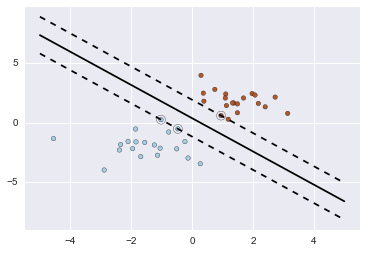

In [7]:
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
f = plt.axis('tight')